In [1]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [2]:
# Cantidad de variables y registros
coches_df = pd.read_csv('coches.csv', delimiter=';')

In [3]:
# Con valores nulos
filas,columnas = coches_df.shape
print(f'Registros: {filas}\nVariables: {columnas}')

Registros: 428
Variables: 5


In [4]:
# Sin valores nulos
coches_df.dropna(inplace= True)
filas,columnas = coches_df.shape
print(f'Registros: {filas}\nVariables: {columnas}')

Registros: 421
Variables: 5


In [5]:
# MODIFICACIÓN DEL FORMATO DE LOS LOS TÍTULOS DE LAS COLUMNAS
coches_df.columns = coches_df.columns.str.strip().str.lower().str.replace(' ','_')
coches_df.rename(columns={'precio':'precio_en_dolares'}, inplace= True)
coches_df.columns

Index(['marca', 'modelo', 'tipo', 'potencia', 'precio_en_dolares'], dtype='object')

In [6]:
# Info del Df
coches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 427
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marca              421 non-null    object 
 1   modelo             421 non-null    object 
 2   tipo               421 non-null    object 
 3   potencia           421 non-null    float64
 4   precio_en_dolares  421 non-null    float64
dtypes: float64(2), object(3)
memory usage: 19.7+ KB


In [7]:
# Agregar la columna con el precio en euros
coches_df['precio_en_euros'] = coches_df.precio_en_dolares * 0.94

In [8]:
# Ultimas 10 Filas
coches_df.tail(10)

,marca,modelo,tipo,potencia,precio_en_dolares,precio_en_euros
418,Volvo,S60 2.5 4dr,Sedan,208.0,29916.0,28121.04
419,Volvo,S60 T5 4dr,Sedan,247.0,32902.0,30927.88
420,Volvo,S60 R 4dr,Sedan,300.0,35382.0,33259.08
421,Volvo,S80 2.9 4dr,Sedan,208.0,35542.0,33409.48
422,Volvo,S80 2.5T 4dr,Sedan,194.0,35688.0,33546.72
423,Volvo,C70 LPT convertible 2dr,Sedan,197.0,38203.0,35910.82
424,Volvo,C70 HPT convertible 2dr,Sedan,242.0,40083.0,37678.02
425,Volvo,S80 T6 4dr,Sedan,268.0,42573.0,40018.62
426,Volvo,V40,Wagon,170.0,24641.0,23162.54
427,Volvo,XC70,Wagon,208.0,33112.0,31125.28


In [9]:
# Numero de marcas
marcas = coches_df.marca.unique()
print(f'Numero total de marcas {len(marcas)}\n{"-" * 70}\nMarcas:\n{marcas}')

Numero total de marcas 38
----------------------------------------------------------------------
Marcas:
['Acura' 'Audi' 'BMW' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'Ford' 'GMC' 'Honda' 'Hummer' 'Hyundai' 'Infiniti' 'Isuzu' 'Jaguar'
 'Jeep' 'Kia' 'Land Rover' 'Lexus' 'Lincoln' 'MINI' 'Mazda'
 'Mercedes-Benz' 'Mercury' 'Mitsubishi' 'Nissan' 'Oldsmobile' 'Pontiac'
 'Porsche' 'Saab' 'Saturn' 'Scion' 'Subaru' 'Suzuki' 'Toyota' 'Volkswagen'
 'Volvo']


In [10]:
# Numero de modelos por marca
coches_df.marca.value_counts()

marca
Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              19
Audi             19
Nissan           17
Honda            16
Volkswagen       15
Chrysler         14
Dodge            13
Mitsubishi       13
Volvo            12
Hyundai          12
Jaguar           12
Kia              11
Mazda            11
Pontiac          10
Subaru           10
Lexus            10
Lincoln           9
Buick             9
Mercury           9
Cadillac          8
Suzuki            8
Infiniti          8
GMC               8
Saturn            8
Saab              7
Porsche           7
Acura             7
Oldsmobile        3
Land Rover        3
MINI              2
Scion             2
Isuzu             2
Jeep              2
Hummer            1
Name: count, dtype: int64

In [11]:
# Modelo del coche más caro
coche_mas_caro_df = coches_df[['marca', 'modelo']][coches_df.precio_en_dolares == coches_df.precio_en_dolares.max()]
print(f'Marca del coche más caro: {coche_mas_caro_df.marca.values[0]}\nModelo del coche más caro: {coche_mas_caro_df.modelo.values[0]}')

Marca del coche más caro: Porsche
Modelo del coche más caro: 911 GT2 2dr


In [12]:
# Precio promedio de cada marca ordenado de menor a mayor
coches_df.groupby('marca')['precio_en_euros'].mean().sort_values()

marca
Scion            12135.400000
Kia              13996.941818
Suzuki           14937.775000
Hyundai          15073.213333
Saturn           15103.920000
MINI             15779.780000
Honda            18773.092500
Mazda            18980.907273
Toyota           19078.172857
Jeep             19856.560000
Oldsmobile       20444.060000
Mitsubishi       20524.683077
Ford             20635.820000
Pontiac          20878.528000
Subaru           21351.442000
Nissan           21617.622353
Chevrolet        22617.165926
Dodge            22710.472308
Isuzu            23141.860000
Chrysler         23778.105714
Mercury          24118.102222
GMC              24712.012500
Buick            26183.595556
Volkswagen       27901.706667
Infiniti         30907.200000
Volvo            32163.196667
Saab             33483.068571
Acura            36275.405714
Lincoln          36787.631111
Audi             36970.298947
BMW              37391.864211
Lexus            37501.864000
Land Rover       39339.940000
Humm

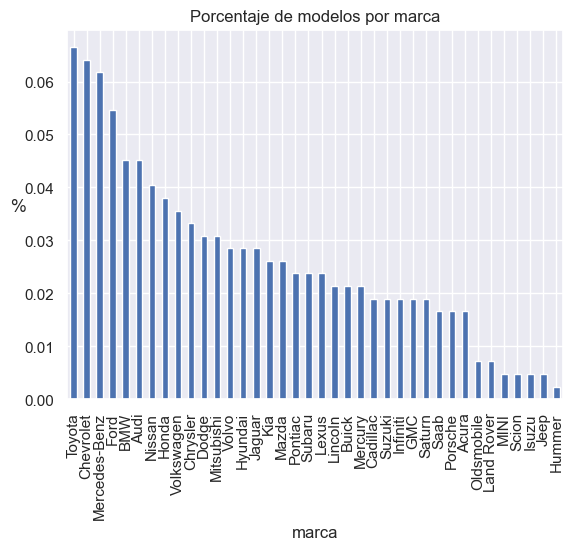

In [13]:
grafico = coches_df.marca.value_counts(normalize=True).plot(kind='bar')
plt.title('Porcentaje de modelos por marca')
plt.ylabel(r'$\%$',rotation=0)
grafico.get_figure().savefig(r'Graficas\Porcentaje_por_marca.png')
plt.show()

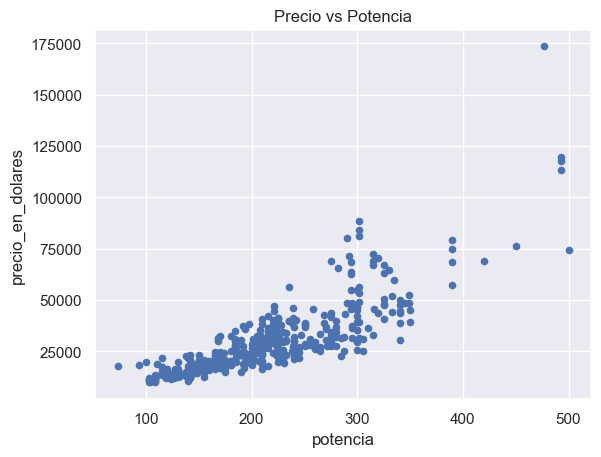

In [14]:
grafico = coches_df[['potencia', 'precio_en_dolares']].plot(kind='scatter', x= 'potencia', y= 'precio_en_dolares')
plt.title('Precio vs Potencia')
grafico.get_figure().savefig(r'Graficas\Precio_vs_Potencia.png')
plt.show()